In [1]:
from sklearn.datasets import fetch_mldata

mnist = fetch_mldata('MNIST original')
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([0., 0., 0., ..., 9., 9., 9.])}

In [2]:
X, y = mnist.data, mnist.target
X.shape

(70000, 784)

In [3]:
y.shape

(70000,)

In [4]:
import numpy as np

X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# shuffle train data
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

In [6]:
from sklearn.linear_model import SGDClassifier

some_digit = X[36000]

sgd_clf = SGDClassifier()
sgd_clf.fit(X_train_scaled, y_train)
sgd_clf.predict([some_digit])

/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


array([3.])

In [7]:
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

array([[  10911.14713645,  -85737.25537601,  -74290.07758015,
          14199.15429689, -103486.64910663,  -24231.13321245,
        -104097.18009762,  -79737.8288671 ,  -95132.00012754,
        -121955.05964076]])

In [8]:
 np.argmax(some_digit_scores)

3

In [9]:
sgd_clf.classes_

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [10]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.90881824, 0.91139557, 0.91008651])

In [11]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5731,    3,   19,    9,   11,   53,   43,    8,   43,    3],
       [   1, 6455,   46,   25,    6,   45,    8,   10,  133,   13],
       [  57,   32, 5313,  109,   92,   22,  109,   56,  153,   15],
       [  47,   36,  129, 5354,    3,  238,   43,   58,  134,   89],
       [  21,   25,   33,    9, 5344,   12,   58,   28,   98,  214],
       [  74,   41,   33,  186,   74, 4606,  115,   23,  175,   94],
       [  29,   21,   52,    2,   42,   89, 5637,    3,   43,    0],
       [  22,   17,   69,   25,   55,   14,    6, 5808,   19,  230],
       [  44,  135,   67,  168,   15,  160,   62,   26, 5035,  139],
       [  50,   32,   26,   85,  159,   31,    3,  199,   85, 5279]])

In [12]:
import  matplotlib.pyplot as plt 

plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

<Figure size 480x480 with 1 Axes>

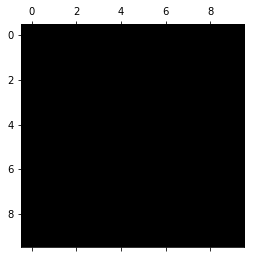

In [13]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

In [14]:
# multilabel classification
y_train_large = (y_train >= 3)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]
y_multilabel

array([[False,  True],
       [False, False],
       [ True,  True],
       ...,
       [ True,  True],
       [ True,  True],
       [ True, False]])

In [15]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_scaled, y_multilabel)

knn_clf.predict([some_digit])

array([[False, False]])

In [17]:
from sklearn.metrics import f1_score

y_train_knn_pred = cross_val_predict(knn_clf, X_train_scaled, y_multilabel, cv=3)
f1_score = f1_score(y_multilabel, y_train_knn_pred, average="weighted")
f1_score

0.9799853504335215